<a href="https://colab.research.google.com/github/KarolinaK-14/ML/blob/main/missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Library page: [https://scikit-learn.org](https://scikit-learn.org)

Documentation/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

The core library for machine learning in Python.

To install the library, use the command below:
```
!pip install scikit-learn
```
To update the library to the latest version, use the command below:
```
!pip install --upgrade scikit-learn
```
### Table of contents:
1. [Importing libraries](#0)
2. [Generating data](#1)
3. [Creating a copy of the data](#2)
4. [Checking for missing values](#3)
5. [Filling in missing values - SimpleImputer](#4)
6. [Handling missing data in time series](#5)



### <a name='0'></a> Importing libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.6.1'

### <a name='1'></a> Generating data

In [3]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}
df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


### <a name='2'></a> Creating a copy of the data

In [4]:
df=df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 420.0+ bytes


### <a name='3'></a> Checking for missing values

In [5]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [6]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [7]:
df.isnull().sum().sum()

np.int64(5)

In [8]:
df.isnull().sum()/len(df)

,0
size,0.166667
color,0.000000
gender,0.166667
price,0.166667
weight,0.333333
bought,0.000000


### <a name='4'></a> Filling in missing values - SimpleImputer

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])
imputer.statistics_

array([415.])

In [10]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [11]:
df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])


array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [14]:
df=df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [15]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [16]:
pd.isnull(df['weight'])

,weight
0,False
1,False
2,False
3,True
4,False
5,True


In [17]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [18]:
df[~pd.isnull(df['weight'])]


,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [19]:
pd.notnull(df['weight'])

,weight
0,True
1,True
2,True
3,False
4,True
5,False


In [20]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [21]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [22]:
df.fillna(value='missing')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,missing,missing,300.0,yes
3,missing,green,female,129.0,missing,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,missing,no


In [23]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [24]:
df['size'].fillna(value='L')
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [25]:
df['size'].fillna(value='L', inplace=True)
df

/tmp/ipython-input-25-4195594293.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].fillna(value='L', inplace=True)


,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [26]:
df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [27]:
df = df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


### <a name='5'></a> Handling missing data in time series

In [37]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)
# date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', freq='h')

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2020-01-01 09:00:00 to 2020-01-01 18:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   8 non-null      float64
dtypes: float64(1)
memory usage: 160.0 bytes


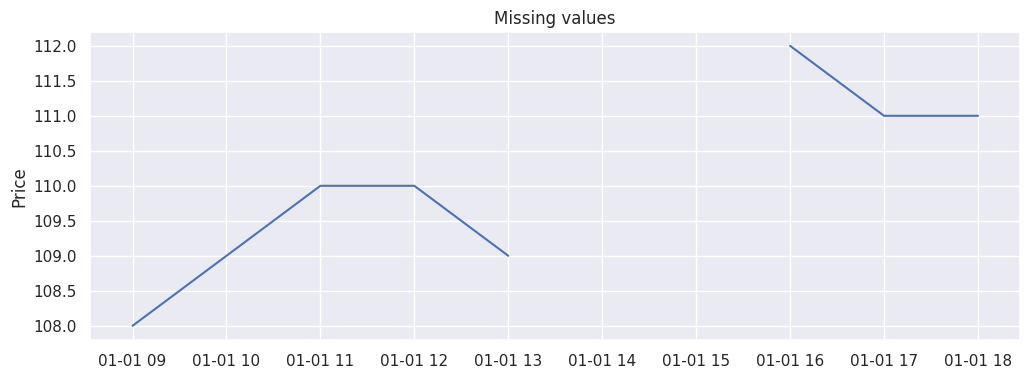

In [53]:
# from pandas.plotting import register_matplotlib_converters
# from matplotlib import pyplot as plt
# import seaborn as sns
# register_matplotlib_converters()
# sns.set()

# plt.figure(figsize=(10, 4))
# plt.title('Missing values')
# _ = plt.plot(df.price)

from pandas.plotting import register_matplotlib_converters
from matplotlib import pyplot as plt
import seaborn as sns

register_matplotlib_converters()
sns.set()

plt.figure(figsize=(12, 4))
plt.title('Missing values')
_ = plt.plot(df.price)
plt.ylabel('Price')
plt.show()

In [60]:
# import plotly.express as px

# df_plotly = df.reset_index()
# px.line(df_plotly, 'index', 'price', width=600, height=400, title='Time series - missing values')

import plotly.express as px

df_plotly = df.reset_index()
df_plotly
px.line(df_plotly, 'index', 'price', width=800, height=400, title='Time series - missing values')

Removing missing data

In [68]:
# df_plotly = df_plotly.dropna()
# px.line(df_plotly, 'index', 'price', width=600, height=400, title='Time series - missing values')

df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=800, height=400, title='Time series - dropping missing values')

Filling missing values with a constant 0

In [75]:
# df_plotly = df.reset_index()
# df_plotly['price_fill'] = df_plotly['price'].fillna(0)
# px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Time series - missing values - filling with 0')
df_plotly = df.reset_index()
df_plotly = df_plotly.fillna(0)
df_plotly
px.line(df_plotly, 'index', 'price', width=800, height=400, title='Time series - missing values - filling with 0')

Filling missing values with a mean

In [77]:
# df_plotly = df.reset_index()
# df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
# px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Time series - missing values - filling with mean')

df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df['price'].mean())
df_plotly
px.line(df_plotly, 'index', 'price_fill', width=800, height=400, title='Time series - missing values - filling with mean')

Applying interpolation

In [78]:
# df_plotly = df.reset_index()
# df_plotly['price_fill'] = df_plotly['price'].interpolate()
# px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Time series - missing values - interpolation')

df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=800, height=400, title='Time series - missing values - interpolation')

Filling missing values using a *forward fill* method


In [79]:
# df_plotly = df.reset_index()
# df_plotly['price_fill'] = df_plotly['price'].ffill()
# px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Time series - missing values - forward fill')

df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].ffill()
px.line(df_plotly, 'index', 'price_fill', width=800, height=400, title='Time series - missing values - forward fill method')

Filling missing values with a *backward fill* method

In [80]:
# df_plotly = df.reset_index()
# df_plotly['price_fill'] = df_plotly['price'].bfill()
# px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Time series - missing values - backward fill')

df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].bfill()
px.line(df_plotly, 'index', 'price_fill', width=800, height=400, title='Times series - filling in missing values with backward fill method')